In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Importing the CSV Files

In [3]:
wood = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
steel = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')

### Information about our Dataset

        Prior to getting started, we'll begin by exploring the dataset and gaining
        a preliminary understanding of it.

In [4]:
wood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          180 non-null    int64 
 1   Name          180 non-null    object
 2   Park          180 non-null    object
 3   Location      180 non-null    object
 4   Supplier      179 non-null    object
 5   Year Built    180 non-null    int64 
 6   Points        180 non-null    int64 
 7   Year of Rank  180 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 11.4+ KB


In [5]:
steel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          180 non-null    int64 
 1   Name          180 non-null    object
 2   Park          180 non-null    object
 3   Location      180 non-null    object
 4   Supplier      180 non-null    object
 5   Year Built    180 non-null    int64 
 6   Points        180 non-null    int64 
 7   Year of Rank  180 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 11.4+ KB


        Both of these dataset contain 180 entries

### Roll Coaster Ranking Over Time

        This function will enable us to plot the ranking of our favourite roller coaster 
        over time. 

In [6]:
def plot_function(ride, park, material):
    
    # Filtering our dataset based on the criteria provided by the user
    filt = (material['Name'] == ride) & (material['Park'] == park)
    filtered_dataset = material.loc[filt]
    
    # Variables for plotting our graph 
    years = [x for x in filtered_dataset['Year of Rank']]
    ranking = [x for x in filtered_dataset['Rank']]
    
    # Plotting our figure 
    ax = plt.subplot()
    ax.plot(years, ranking, marker = 'o', linewidth = 2, color = 'orange')
    ax.invert_yaxis()
    
    # Labelling our figure
    plt.xlabel('Year of Ranking')
    plt.ylabel('Ranking')
    plt.title('Ranking for ' + str(ride) + ' Over Time')
    plt.show()  

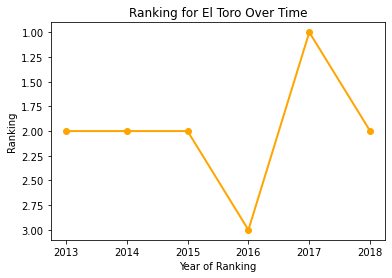

In [7]:
plot_function("El Toro", "Six Flags Great Adventure", wood)

### Multiple Roll Coaster Rankings Over Time

In [8]:
def comparison(ride1, park1, material1, ride2, park2, material2):
    
    # Filtering our dataset based on the criteria provided by the user
    filt1 = (material1['Name'] == ride1) & (material1['Park'] == park1)
    filt2 = (material2['Name'] == ride2) & (material2['Park'] == park2)
    
    df1 = material1.loc[filt1]
    df2 = material2.loc[filt2]
    
    # Variables for plotting our graph 
    years = [x for x in df1['Year of Rank']]
    ranking1 = [x for x in df1['Rank']]
    ranking2 = [x for x in df2['Rank']]
    
    # First roller coaster
    ax = plt.subplot()
    ax.plot(years, ranking1, marker = 'o', linewidth = 2, color = 'orange')
    ax.plot(years, ranking2, marker = 'o', linewidth = 2, color = 'steelblue')
    ax.invert_yaxis()
    
    # Labelling our figure
    plt.xlabel('Year of Ranking')
    plt.ylabel('Ranking')
    plt.legend([ride1, ride2])
    plt.title('Comparing Ranking of {0} and {1} Over Time'.format(str(ride1),str(ride2)))
    plt.show()  

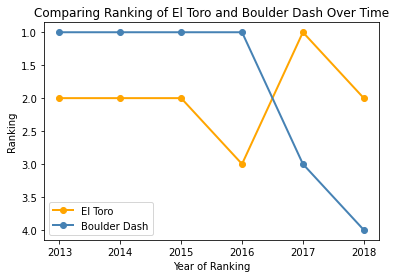

In [9]:
comparison("El Toro", "Six Flags Great Adventure", wood, "Boulder Dash", "Lake Compounce", wood)

### Top Ranked Roller Coasters Over Time

In [10]:
def top_ranked(n,material):
    
    # Creating a new dataframe based on our criteria
    data = material[(material['Rank'] <= n)].reset_index()
    
    # Listing the unique roller costers and their frequency
    unique_rank = data.groupby(['Name', 'Park']).index.count().reset_index()
    ax_rank = plt.subplot()
    
    # For loop to iterate through the roller coaster in our unique dataframe
    for i in unique_rank.index:
            criteria = (unique_rank['Name'][i] == data['Name']) & (unique_rank['Park'][i] == data['Park'])
            plot_data = data.loc[criteria]
            ax_rank.plot(plot_data['Year of Rank'], plot_data['Rank'], marker = 'o', label = unique_rank['Name'][i])
    
    # Formating our plot
    ax_rank.invert_yaxis()
    plt.legend(loc = 'center left', fancybox = True, bbox_to_anchor = (1.0,0.5))
    plt.xlabel('Year of Ranking')
    plt.ylabel('Ranking')
    plt.show()
    

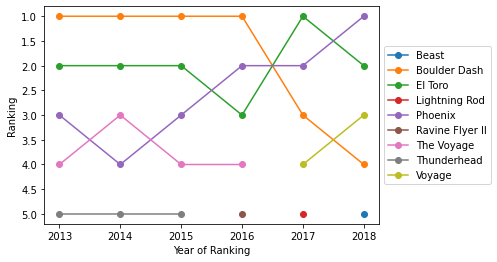

In [11]:
top_ranked(5, wood)

### Plotting Histograms

In [12]:
coaster_info = pd.read_csv('roller_coasters.csv')

In [103]:
coaster_info.columns

Index(['name', 'material_type', 'seating_type', 'speed', 'height', 'length',
       'num_inversions', 'manufacturer', 'park', 'status'],
      dtype='object')

        The function below enables us to create a histogram to visualize the 
        distribution of values for a given column

In [20]:
def plot_histogram(column_name, dataframe):
    # Begins by checking if the column contains numerical values
    if dataframe[column_name].dtype == 'float64':
        plt.hist(dataframe[column_name].dropna())
        plt.xlabel(column_name.title())
        plt.ylabel('Count')
        plt.show()
    else:
        print('Invalid column! Please enter a column containing numerical values')

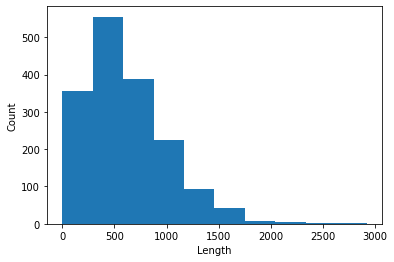

In [24]:
plot_histogram('length', coaster_info)

### Histograms for Roll Coaster Heights

        Within this situation we'll have to account for outliers! Otherwise the 
        histogram won't display useful information.

In [74]:
def plot_height(df_name):
    # Removing any NaN or Null values
    heights = df_name['height'].dropna()
    
    # Finding outliers in our data
    percentile_99th = np.percentile(heights,99)
    percentile_10th = np.percentile(heights,10)
    
    # Removing outliers
    outlier_filter = (df_name['height'] <= percentile_99th) 
    filtered_heights = df_name[outlier_filter]['height']
    
    # Plotting our histogram
    rx = plt.subplot()
    rx.hist(filtered_heights, bins = 20)
    rx.set_xticks([x for x in range(0,int(max(filtered_heights))+10,10)])
    
    # Labelling our histogram
    plt.title('Histogram of Roller Coaster Heights')
    plt.xlabel('Height')
    plt.ylabel('Count')
    plt.show()

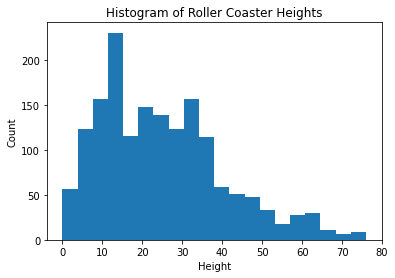

In [75]:
plot_height(coaster_info)

### Number of Inversions for Roller Coasters

        We'll create a function that'll provide a visual display of the number of 
        inversions for each roller coaster within a specified park

In [82]:
def plot_inversion(df_name, park_name):
    
    # Filtering our data based on the criteria
    park_coasters = df_name[df_name['park'] == park_name]
    
    # Gathering our x and y values
    high_low_sort = park_coasters.sort_values('num_inversions', ascending = False)
    x = high_low_sort['name']
    y = high_low_sort['num_inversions']
    
    # Plotting the bar graph
    ax = plt.subplot()
    ax.bar(range(len(x)), y)
    
    # X Axis
    ax.set_xticks(range(len(x)))
    ax.set_xticklabels(x, rotation = 90)
    
    # Labelling
    plt.title('Number of Inversions Per Roller Coaster at {}'.format(park_name))
    plt.xlabel('Roller Coaster')
    plt.ylabel('Number of Inversions')
    plt.show()

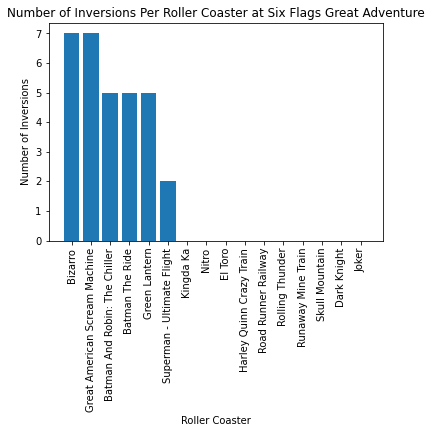

In [83]:
plot_inversion(coaster_info, 'Six Flags Great Adventure')

### Status of Roller Coasters

        We'll continue by plotting a pie chart to explore the percentage of roller 
        coasters that are open to those that are closed

In [90]:
def status_pie(df_name):
    opened = df_name[df_name['status'] == 'status.operating']
    closed = df_name[df_name['status'] == 'status.closed.definitely']
    status_counts = [len(opened), len(closed)]
    
    colors = ['lightskyblue', 'gold']
    
    # Plotting the pie chart
    plt.pie(status_counts, colors = colors, shadow = True, autopct = '%0.1f%%', labels = ['Open', 'Closed'])
    plt.axis('equal')
    plt.show()

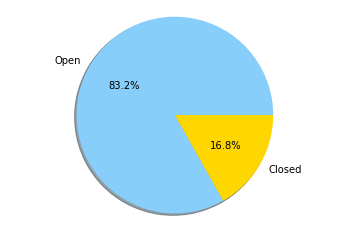

In [91]:
status_pie(coaster_info)

### Scatter Plot

        This scatter plots enables us to compare two different columns from 
        our data set. The example used below is 'length' and 'speed'.

In [100]:
def plot_scatter(df_name, x_column, y_column):
    plt.scatter(df_name[x_column], df_name[y_column])
    plt.title('Scatter Plot of {0} vs {1}'.format(x_column.title(), y_column.title()))
    plt.xlabel(x_column.title())
    plt.ylabel(y_column.title())
    plt.show()

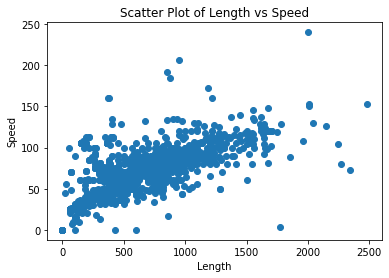

In [102]:
plot_scatter(coaster_info, 'length', 'speed')

### Seating Type Popularity

        This pie charts enables us the explore which of the seating types are the
        most popular. 

In [154]:
def seating(df_name):
    
    # Counting the frequency of each seating type 
    seat = df_name.groupby('seating_type').name.count().reset_index()
    seat.rename(columns={'name' : 'Count'}, inplace = True)
    seat.loc[14, 'seating_type'] = 'Not Specified'
    
    # Partitioning the 'Sit Down' seating option
    explode = (0,0,0,0,0,0,0,0,0.1,0,0,0,0,0,0)
    
    # Creating a pie chart
    plt.figure(figsize=(10,10))
    plt.pie(seat['Count'], explode = explode, autopct = '%0.1f%%', pctdistance = 1.1)
    plt.legend(seat['seating_type'], loc = 'best')
    plt.tight_layout()
    plt.show()
    

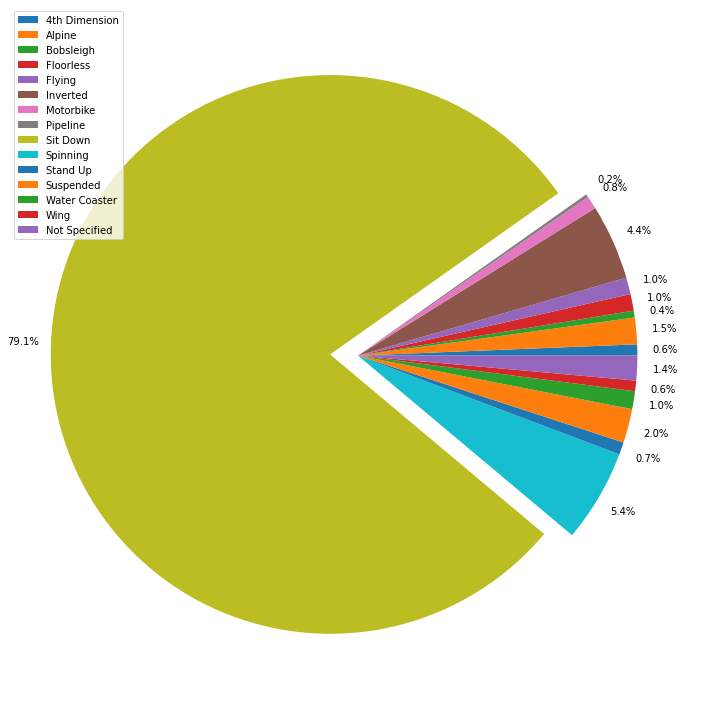

In [155]:
seating(coaster_info)